In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel("../Student_Mobility_2013-14.xlsx")
df = df[df.MobilityType == "Mob-SMS"]

In [3]:
res = df[["SendingCountry", "ReceivingCountry", "MobiilityID"]]\
    .groupby(by=["SendingCountry", "ReceivingCountry"]).count().unstack().fillna(0)

In [4]:
res.columns = [col[1] for col in res.columns]

In [5]:
res.index.name = "sending"

In [6]:
# PT sent in total
df[["SendingCountry", "MobiilityID"]].groupby(by=["SendingCountry"]).count().T.PT

MobiilityID    5325
Name: PT, dtype: int64

In [7]:
# PT received in total
df[["ReceivingCountry", "MobiilityID"]].groupby(by=["ReceivingCountry"]).count().T.PT

MobiilityID    9020
Name: PT, dtype: int64

In [8]:
res = res.T

In [9]:
# How many students has PT sent
print("Sum of columnt PT", sum(res.PT))

Sum of columnt PT 5325.0


In [10]:
# How many students has PT received
print("Sum of row PT", np.sum(res[res.index == "PT"].values))

Sum of row PT 9020.0


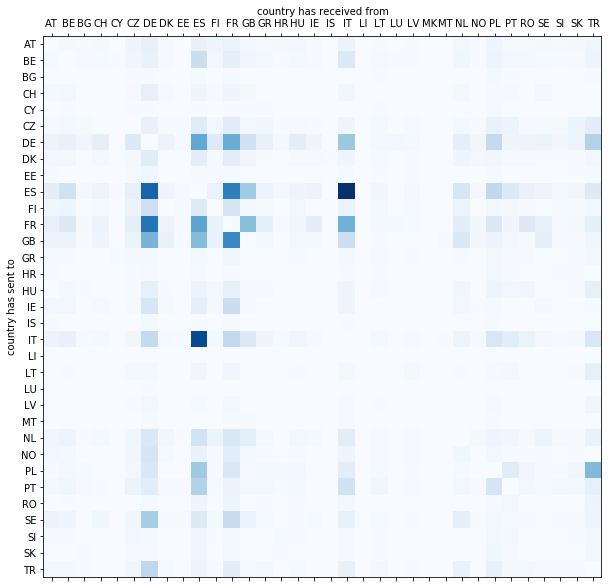

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('white')
ax.matshow(res, cmap=plt.get_cmap('Blues'))
ax.set_xticks(np.arange(0, len(res.columns.values)))
ax.set_yticks(np.arange(0, len(res.index.values)))
ax.set_yticklabels(res.index.values)
ax.set_xticklabels(res.columns.values)
ax.xaxis.set_label_position('top') 
ax.set_ylabel("country has sent to")
ax.set_xlabel("country has received from")
plt.show()